# Take Home Miderm - Fall 2022

In this take home midterm the goal is to implement a **Turkish Sentiment Analyser** using Vector Space model.

In the context of this midterm, dentiment analysis is considered as a binary text classification.

## Dataset

The dataset is taken from https://www.win.tue.nl/~mpechen/projects/smm/, where the Turkish Movie Reviews data set is publicly avaliable: https://www.win.tue.nl/~mpechen/projects/smm/Turkish_Movie_Sentiment.zip.



## Dataset Preperation
---

The following code piece downloads the zip file, and then unzip it into the current directory.

In [1]:
!curl https://www.win.tue.nl/~mpechen/projects/smm/Turkish_Movie_Sentiment.zip -o ./Turkish_Movie_Sentiment.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  520k  100  520k    0     0   360k      0  0:00:01  0:00:01 --:--:--  360k


In [2]:
!ls

sample_data  Turkish_Movie_Sentiment.zip


In [3]:
!unzip /content/Turkish_Movie_Sentiment.zip -d /content

Archive:  /content/Turkish_Movie_Sentiment.zip
  inflating: /content/tr_polarity.neg  
  inflating: /content/tr_polarity.pos  


In [4]:
!ls -l

total 2020
drwxr-xr-x 1 root root   4096 Nov 16 14:35 sample_data
-rw-r--r-- 1 root root 766282 Feb 22  2013 tr_polarity.neg
-rw-r--r-- 1 root root 755066 Feb 22  2013 tr_polarity.pos
-rw-r--r-- 1 root root 533335 Nov 18 12:01 Turkish_Movie_Sentiment.zip


## Dataset Content
---

The zip file contains two txt file, with a *.neg extension and a *.pos extension, repectively. Here, "pos" stands for positive movie reviews and "neg" for negative movie reviews.

In each file, every line has one review, and hence 5331 reviews in total for each category.

In [5]:
!wc -l ./tr_polarity.neg

5331 ./tr_polarity.neg


In [6]:
!wc -l ./tr_polarity.pos

5331 ./tr_polarity.pos


## Read reviews from files

In [7]:
# Positive Reviews
import os;
with open("./tr_polarity.pos", 'rb') as f:
     reviews_pos = f.read().decode('iso-8859-9').replace('\r', '');

print(reviews_pos)

gerçekten harika bir yapim birçok kez izledim gene izlerim özgürlük askini ve ingilizlerin ne kadar vahset olduklarini gözler önüne seren bir film ve tabi ki ask.... 
her izledigimde hayranlik duydugum gerçek klasik diyebilecegimiz filmlerden . içinde teknik hatalar barindirsa bile sinema olgusunun en üst noktalarindan.. 
gerçekten tarihi savas filmleri arasinda tartismasiz en iyisi , 12 yil boyunca acaba ikincisi çekirimi diye bekledigim bir film ,belki william wallace babasinin ölümünden sonra amcasi yanina almisti onu yetistirmisti belki bunu anlatan mükkemmel bir filim olablilr=). 
aldigi ödülleri sonuna dek hak eden muhtesem bir basyapit . 
özgürlük denilince aklima gelen ilk film.bir basyapit.. 
sinema tarihinin gelmis geçmis en büyük en büyük bes basyapitindan biri ve en iyi tarihi filmi.defalarca defalarca segredilen ve herseferindede etkileyiciliginden ve büyüleyiciliginden hiçbirsey kaybetmeyen kusursuz bir yapit.. 
defalarca kez izlenecek bir basyapit.. .  tarih kahramanlari

In [8]:
list_pos = reviews_pos.split('\n');
list_pos[:10]

['gerçekten harika bir yapim birçok kez izledim gene izlerim özgürlük askini ve ingilizlerin ne kadar vahset olduklarini gözler önüne seren bir film ve tabi ki ask.... ',
 'her izledigimde hayranlik duydugum gerçek klasik diyebilecegimiz filmlerden . içinde teknik hatalar barindirsa bile sinema olgusunun en üst noktalarindan.. ',
 'gerçekten tarihi savas filmleri arasinda tartismasiz en iyisi , 12 yil boyunca acaba ikincisi çekirimi diye bekledigim bir film ,belki william wallace babasinin ölümünden sonra amcasi yanina almisti onu yetistirmisti belki bunu anlatan mükkemmel bir filim olablilr=). ',
 'aldigi ödülleri sonuna dek hak eden muhtesem bir basyapit . ',
 'özgürlük denilince aklima gelen ilk film.bir basyapit.. ',
 'sinema tarihinin gelmis geçmis en büyük en büyük bes basyapitindan biri ve en iyi tarihi filmi.defalarca defalarca segredilen ve herseferindede etkileyiciliginden ve büyüleyiciliginden hiçbirsey kaybetmeyen kusursuz bir yapit.. ',
 'defalarca kez izlenecek bir basyap

In [9]:
# Negative Reviews
with open("./tr_polarity.neg", 'rb') as f:
     reviews_neg = f.read().decode('iso-8859-9').replace('\r', '');

print(reviews_neg)

giseye oynayan bir film.mel gibson'in oyunculugu yine çok kötü.film bastan sona duygu sömürüsü ama anlayan nerde!. 
bircok yonden sahip olduklari zayifliklari populerligi iyi kullanmasiyla gidermis zayif bir yapim... 
1995 ten bu yana bu tür filmler artti , o zamanlar basarili sayilabilecekse de suan emin degilim. konusu baya siradan .. 
mel gibson tam bir ingiliz düsmani her filminde belirtiyor bunu. film yine cok iyi. biz kurtulus mücadelemizi böyle bir filmle simgeleyemedik. üzülüyorum bu yüzden.. 
milliyetçi bir film tavsiye etmiyorum.... 
saçma upuzun diyolaglar,kopuk sahneler,aniden biten bir film ve iste tarantino. .  ( 1 de çok ya,hadi neyse). 
bu filme çok güsel, 10 numara diyen arkadaslar olmus ama sanirim ben onlarla ayni filmi seyretmedim :s oyuncu kadrosu ne kadar iyi olursa olsn, film çok kötü. film de ne anlatilio ne amaçlanio hiç bisi belli deil, bence vaktinizi hiç bosa harcamayin daha güsel filmler seyredin  
filmi seyretmeden önce bu siteye baktim ve 9.1 aldigini gör

In [10]:
list_neg = reviews_neg.split('\n');
list_neg[10:]

['bu kadar puani kesinlikle haketmedigini düsünüyorum.oyuncu kadrosu ve burada verilen puani düsünerek izlemistim filmi.fakat sonuç kesinlikle fiyasko.izledigim en kötü filmlerden biriydi.. ',
 'tarantino sevmez olarak filmin müzikleri ve travoltanin oyunculugu disinda ne anladim ne begendim nede begenilmesini anlayabildim tarantinoya hayir... ',
 'yuhh..filme basyapit dedi yaa..  ',
 'bir film ancak bu kadar geveze olur... ',
 'altaki yorumum unuttugum bir neden daha var.7- bol bol küfür.. ',
 'sunu anladimki rezarvuar köpekleri,ucuz roman ve alpaçino nun oynadigi köstebek filmleri 5 para etmez ve bu filmde igrenç ötesiydi sanatsal film diolar bide ne sanati ya aranzda pariste dogan varmi bide herkes ii yorum yazmis esefle kiniyorum filmin tek kelimelik özetiii iğrençtiiiiiiiiiii. ',
 'sürekli siddet temali ve insani sikan uzun diyaloglari olan bir film . ',
 'kelimenin tam anlamiyla tras,berbat,rezalet,lüzumsuz vs..2 puan bile zor. ',
 'hayatimda izledigim en berbart 10 film listesin

## Model Construction and Evaluation
---

In this midterm, you are asked to fullfil the following conditions given below by implementing the neccessary NLP tasks:

**Assumption:** Each review is a document as the Vector Space Model states.

**Assumption:**  Each review category, **pos** and **neg**, is a class/cluster.

1. Divide the dataset into two parts, one of which holds the 90% and the other one of which holds the remaining 10%. Call the former as **training** dataset, and the latter as the **test** dataset. This can be done in 10 ways and results in 10 different non-overlappling pairs of train-test. For each of the 10 pairs, repeat the following steps. See for further instructions and pseudo code[cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#Leave-one-out_cross-validation).

> 1.1. Build a Model using the **training** dataset.

> 1.2. Using cosine similarity measure, classify each review in the **test** dataset, such that, 

>  * if the review has a smilarity score to the reviews in **pos** training dataset, then mark the review as **pos**; 
  * otherwise, mark it as **neg**

> 1.3. Count the number of *true-positives*, *false-positives*, *true-negatives* and *false-negatives*. 

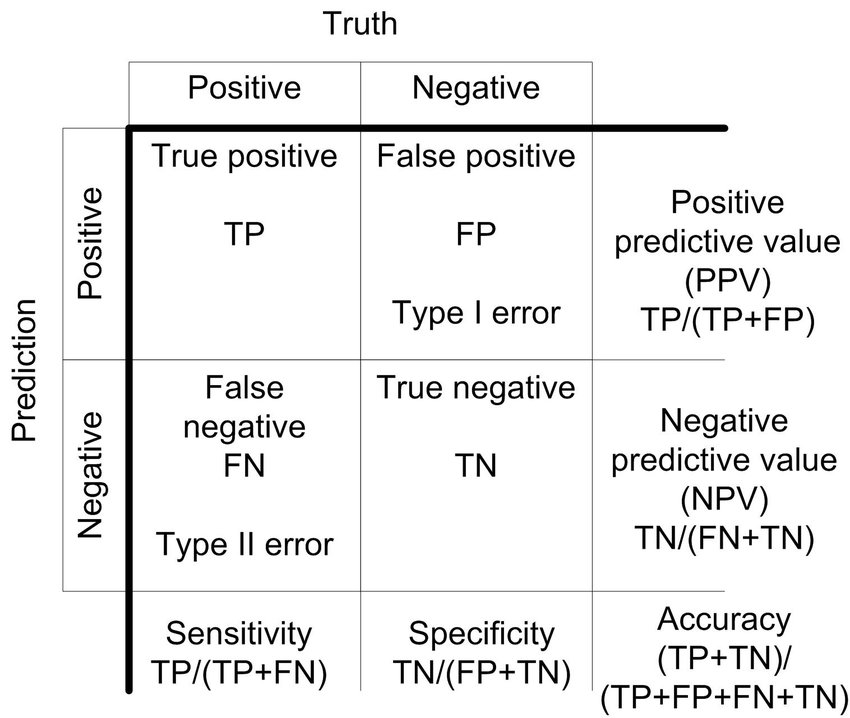

## _

> 1.4. Calculate **Accuracy** for the current train-test pair.

2. After calculating 10 accuracy scores, take the average (mean), and report it as the final performance score.

3. Review your solution, observe and give a list of possible improvements in your first implementation using examples and demonstrations.

4. From the list of improvements, pick the one that is highly likely to impact most to the accuracy, and make that changes in your implementation, and repeat the steps from 3. item (including). Do not make the changes in place, do the new implementation from scratch continuing the notebook with new cells.

5. Compare the two mean accuracy scores, and give a short conclusion.

## Step 1: Preperation of test environment

> Sub-Step 1: Create document vectors. In document vectors, you may use one-hot model or TF (Term-Frequency) model. Trivial approach is one-hot, so try it first.

> Sub-Step 2: Divide each document list, **pos** and **neg**, simultenously, into train and test splits, at 90 and 10 percent of the list.

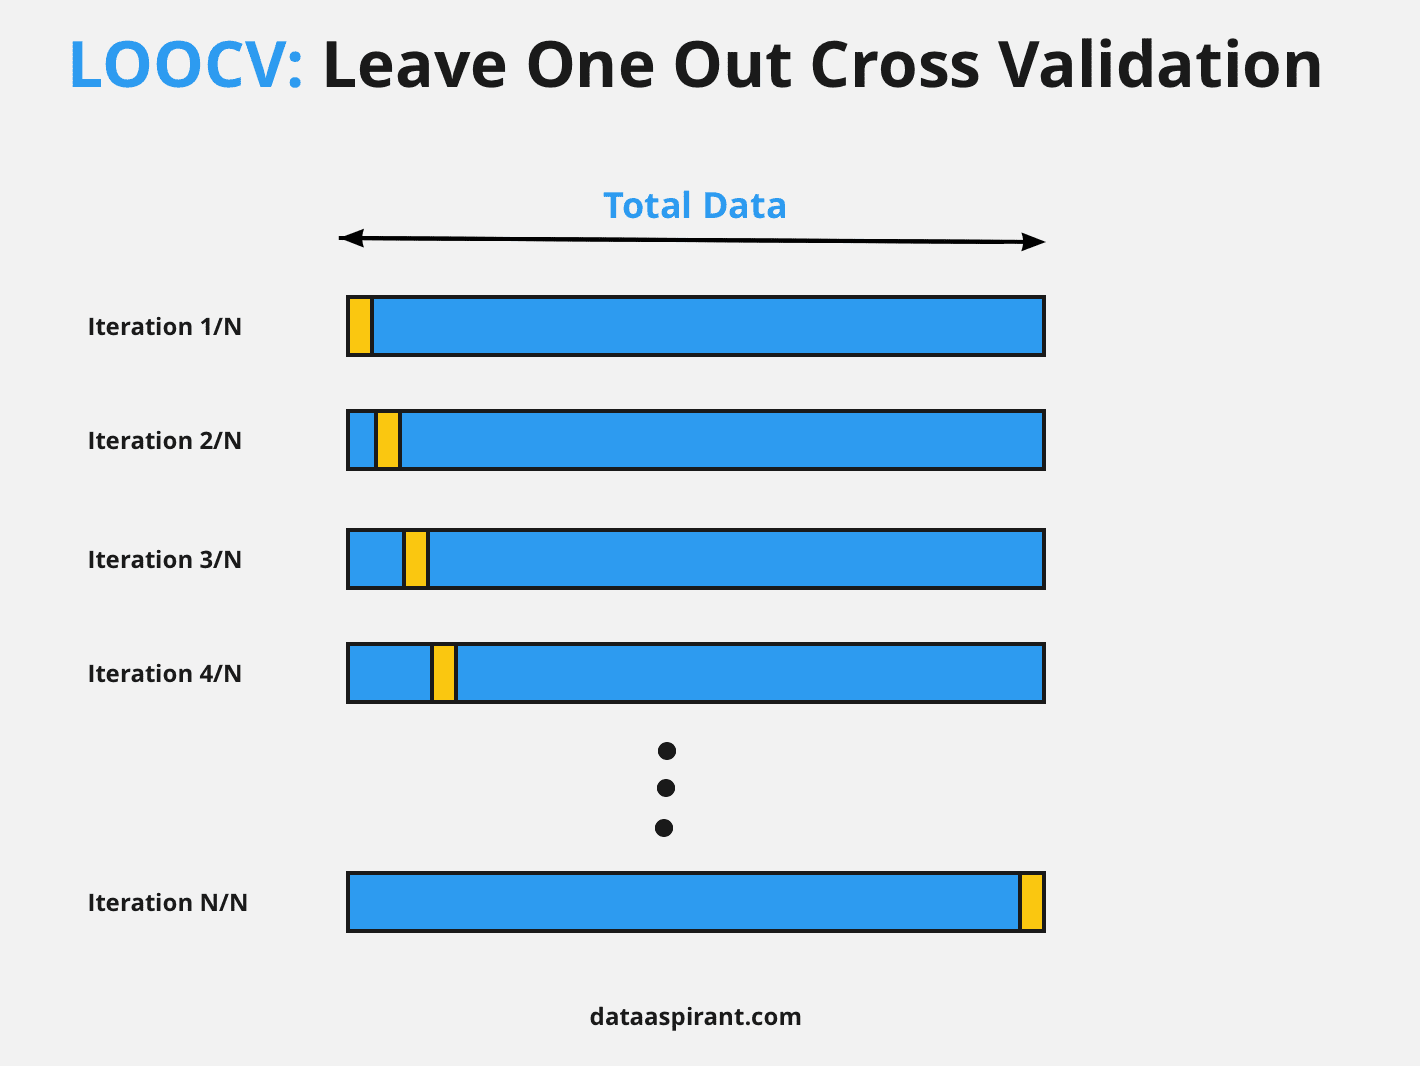

After this part, I couldn't run colab because it gave the error "Error: Your session crashed after using all available RAM". I tried my local machine for this, but I couldn't.

In [ ]:
vocab = set()
for review in list_pos:
	vocab.update(review.split(' '))
for review in list_neg:
	vocab.update(review.split(' '))

In [12]:
# One-Hot Model
# Create a document vector for each review
doc_vecs_pos = []
for review in list_pos:
	vec = []
	for word in vocab:
		if word in review.split(' '):
			vec.append(1)
		else:
			vec.append(0)
	doc_vecs_pos.append(vec)

doc_vecs_neg = []
for review in list_neg:
	vec = []
	for word in vocab:
		if word in review.split(' '):
			vec.append(1)
		else:
			vec.append(0)
	doc_vecs_neg.append(vec)

In [ ]:
# Term-Frequency Model
# Create a document vector for each review

def tf(word, doc):
    return doc.count(word) / len(doc)

doc_vecs_pos = []
for review in list_pos:
	vec = []
	for word in vocab:
		vec.append(tf(word, review.split(' ')))
	doc_vecs_pos.append(vec)

doc_vecs_neg = []
for review in list_neg:
	vec = []
	for word in vocab:
		vec.append(tf(word, review.split(' ')))
	doc_vecs_neg.append(vec)

In [ ]:
# 90% of the list for training
train_pos = doc_vecs_pos[:int(len(doc_vecs_pos)*0.9)]
train_neg = doc_vecs_neg[:int(len(doc_vecs_neg)*0.9)]

# 10% of the list for testing
test_pos = doc_vecs_pos[int(len(doc_vecs_pos)*0.9):]
test_neg = doc_vecs_neg[int(len(doc_vecs_neg)*0.9):]

In [ ]:
# Print the number of training and testing samples for each class
print("Number of training samples for positive reviews: ", len(train_pos))
print("Number of training samples for negative reviews: ", len(train_neg))
print("Number of testing samples for positive reviews: ", len(test_pos))
print("Number of testing samples for negative reviews: ", len(test_neg))

## Step 1.1: Build the Model using the training dataset.

Using the training data split (i.e. 90% of the dataset), figure out a representation scheme, model for each class. 

Explain it briefly.

In [ ]:
# Calculate the average vector for each class
avg_vec_pos = [0] * len(train_pos[0])
for vec in train_pos:
	for i in range(len(vec)):
		avg_vec_pos[i] += vec[i]
for i in range(len(avg_vec_pos)):
	avg_vec_pos[i] /= len(train_pos)

avg_vec_neg = [0] * len(train_neg[0])
for vec in train_neg:
	for i in range(len(vec)):
		avg_vec_neg[i] += vec[i]
for i in range(len(avg_vec_neg)):
	avg_vec_neg[i] /= len(train_neg)

In [ ]:
# Print the length of the average vectors
print(len(avg_vec_pos))
print(len(avg_vec_neg))

## Step 1.2: Classify each review in the **test** split

Using the **Model** you have decided, take each review from both **pos** and **neg** class, and compare with the **pos** class representation in your **Model**, and also with the **new** class representation, using Cosine Similarity measure.

Repeat the comparison for each review until all reviews in the test split run out. 

Record the result of each comparison, for instance, as a pair like 

> "1:1" which stands for true-positive: that is, your prediction is pos and the review is from **pos** test split. 

> "1:0" would then stands for "false positive": that is, your predection is **pos** (1) and review is from **neg** test split (0). 

> "0:1" is "false negative": your prediction is negative (0) and review is from **pos** test split (1).

> "0:0" is "true negative": your prediction is negative (0) and review is from **neg** test set (0).

In [ ]:
# Calculate the cosine similarity between two vectors
def cosine_similarity(vec1, vec2):
	dot_product = 0
	mag1 = 0
	mag2 = 0
	for i in range(len(vec1)):
		dot_product += vec1[i] * vec2[i]
		mag1 += vec1[i] * vec1[i]
		mag2 += vec2[i] * vec2[i]
	return dot_product / (math.sqrt(mag1) * math.sqrt(mag2))


# Classify each review in the test split
# 0 for negative, 1 for positive
results = []
for i in range(10):
	for vec in test_pos:
		if cosine_similarity(vec, avg_vec_pos) > cosine_similarity(vec, avg_vec_neg):
			results.append("1:1")
		else:
			results.append("1:0")
	for vec in test_neg:
		if cosine_similarity(vec, avg_vec_pos) > cosine_similarity(vec, avg_vec_neg):
			results.append("0:1")
		else:
			results.append("0:0")	

In [ ]:
# Print the results
print(results)

## Step 1.3 and 1.4: Calculate Accuracy score for the 10 pairs of train-test split.

In [ ]:
# Calculate the accuracy
def accuracy(true_labels, predicted_labels):
	correct = 0
	for i in range(len(true_labels)):
		if true_labels[i] == predicted_labels[i]:
			correct += 1
	return correct/len(true_labels)


tp = 0
tn = 0
fp = 0
fn = 0
for result in results:
	if result == "1:1":
		tp += 1
	elif result == "0:0":
		tn += 1
	elif result == "1:0":
		fp += 1
	elif result == "0:1":
		fn += 1

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

## Step 2: Report the Performance of the Current Approach

In [ ]:
# Results of the Current Approach 
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1: " + str(f1))

## Step 3: List of Improvement Points

## Step 4: Take one of the Improvements and Implement.

### Step 1: Improved Model

Implement 

> Step 1 through 1.1, 1.2, 1.3 and 1.4. below

In [ ]:
# Stemming
ps = PorterStemmer()
list_pos = []
list_neg = []
for review in reviews_pos:
    words = review.split(' ')
    words = [ps.stem(word) for word in words]
    list_pos.append(' '.join(words))
for review in reviews_neg:
    words = review.split(' ')
    words = [ps.stem(word) for word in words]
    list_neg.append(' '.join(words))


# Calculate the average vector for each class
avg_vec_pos = [0] * len(train_pos[0])
for vec in train_pos:
	for i in range(len(vec)):
		avg_vec_pos[i] += vec[i]
for i in range(len(avg_vec_pos)):
	avg_vec_pos[i] /= len(train_pos)

avg_vec_neg = [0] * len(train_neg[0])
for vec in train_neg:
	for i in range(len(vec)):
		avg_vec_neg[i] += vec[i]
for i in range(len(avg_vec_neg)):
	avg_vec_neg[i] /= len(train_neg)
 


In [ ]:
# Calculate the cosine similarity between two vectors
def cosine_similarity(vec1, vec2):
	dot_product = 0
	mag1 = 0
	mag2 = 0
	for i in range(len(vec1)):
		dot_product += vec1[i] * vec2[i]
		mag1 += vec1[i] * vec1[i]
		mag2 += vec2[i] * vec2[i]
	return dot_product / (math.sqrt(mag1) * math.sqrt(mag2))


# Classify each review in the test split
# 0 for negative, 1 for positive
results = []
for vec in test_pos:
	if cosine_similarity(vec, avg_vec_pos) > cosine_similarity(vec, avg_vec_neg):
		results.append("1:1")
	else:
		results.append("1:0")
for vec in test_neg:
	if cosine_similarity(vec, avg_vec_pos) > cosine_similarity(vec, avg_vec_neg):
		results.append("0:1")
	else:
		results.append("0:0")

In [ ]:
# Calculate the improved_accuracy
def accuracy(true_labels, predicted_labels):
	correct = 0
	for i in range(len(true_labels)):
		if true_labels[i] == predicted_labels[i]:
			correct += 1
	return correct/len(true_labels)


tp = 0
tn = 0
fp = 0
fn = 0
for result in results:
	if result == "1:1":
		tp += 1
	elif result == "0:0":
		tn += 1
	elif result == "1:0":
		fp += 1
	elif result == "0:1":
		fn += 1

improved_accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

### Step 2: Performance of Improved Model.

In [ ]:
# Results of the Current Approach (Term-Frequency Model)
print("Improved accuracy: " + str(improved_accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1: " + str(f1))

## Step 5: Comparison of Improved Model with the Trivial Model

Compare both models based on performance scores and give some suggestions for further improvements.



In [ ]:
print("Accuracy: " + str(accuracy))
print("Improved accuracy: " + str(improved_accuracy))